In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
cancer.data.shape

(569, 30)

In [13]:
cancer

# 0번째 radius, 1번째 texture 확인
# mean radius = 6.981   28.11, mean texture = 9.71, 39.28

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [117]:
df= pd.DataFrame(cancer.data)

In [118]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = np.zeros((569, 2))

In [119]:
X[:,0 ] = df[0]

In [120]:
X[:, 1] = df[1]

In [121]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# log regression 생성

In [126]:
log_model = LogisticRegression().fit(X,y)
y_pred = log_model.predict(X)
y_score = log_model.decision_function(X)

C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
y_score = log_model.fit(X_train, y_train).decision_function(X_test)

C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## ROC and PR of log regression

In [128]:
roc_auc = roc_auc_score(y_test, y_score)

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

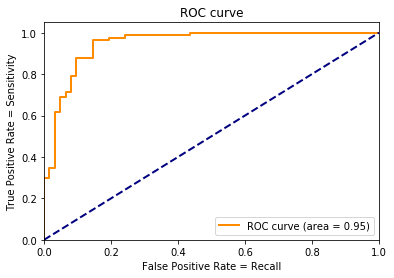

In [130]:

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

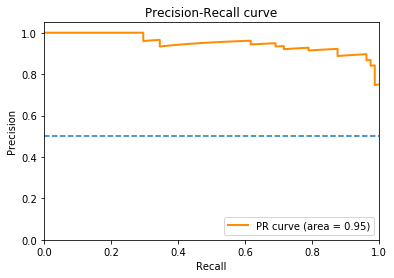

In [131]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# calculate precision-recall AUC
pr_auc = auc(recall, precision)

plt.plot(recall, precision, lw=2, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

## AUC & PR both 0.95

# Decision Tree  - XGB 생성

In [142]:
import xgboost as xgb
from xgboost import XGBClassifier

In [148]:
xgbclass = XGBClassifier(n_estimators=100, max_depth=2, oob_score=True, random_state=0)

model = xgbclass.fit(X, y)

In [149]:
xg_predicted=model.predict(X)

In [150]:
xg_probs = model.fit(X_train, y_train).predict_proba(X_test)

In [154]:
xg_probs = xg_probs[:, 1]

In [155]:
xg_probs

array([0.8654787 , 0.7979272 , 0.87997556, 0.00402045, 0.9697054 ,
       0.9959117 , 0.01684206, 0.00416976, 0.01684206, 0.36259368,
       0.814372  , 0.9901669 , 0.9418926 , 0.01317596, 0.97297657,
       0.07017305, 0.94987774, 0.99129313, 0.02892129, 0.86194533,
       0.00416976, 0.01900347, 0.38348103, 0.93960035, 0.7029715 ,
       0.99129313, 0.9883514 , 0.34835678, 0.8810045 , 0.93960035,
       0.36259368, 0.00416976, 0.5001998 , 0.93960035, 0.86194533,
       0.99129313, 0.09527521, 0.01684206, 0.8465685 , 0.95353913,
       0.7979272 , 0.39643127, 0.9793819 , 0.77839863, 0.956184  ,
       0.00416976, 0.00402045, 0.96957314, 0.5621362 , 0.00439107,
       0.964127  , 0.01969822, 0.93960035, 0.13955484, 0.00491326,
       0.00416976, 0.9521674 , 0.99129313, 0.9681461 , 0.08520761,
       0.9932045 , 0.99129313, 0.5335559 , 0.96479523, 0.00439107,
       0.9932045 , 0.95353913, 0.8654787 , 0.16092665, 0.02892129,
       0.8465685 , 0.48939076, 0.00439107, 0.79342306, 0.02996

In [156]:
xg_roc_auc = roc_auc_score(y_test, xg_probs)

In [157]:
fpr, tpr, thresholds = roc_curve(y_test, xg_probs)

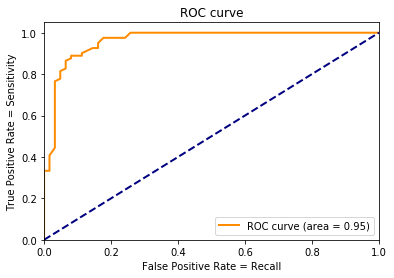

In [158]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

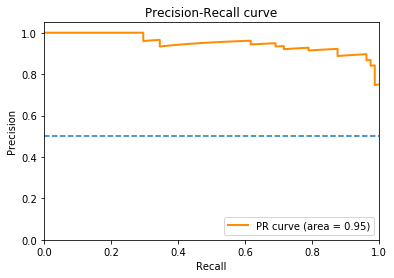

In [159]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# calculate precision-recall AUC
pr_auc = auc(recall, precision)

plt.plot(recall, precision, lw=2, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

## 열심히 했는데 점수가 똑같다. 아하하하하.하하ㅠㅠㅠㅠ
## AUC, PR both 0.95

# 그리드서치

In [161]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}

In [164]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X, y)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

최적의 파라미터:  {'C': 10, 'penalty': 'l1'}
최고 성능 모델:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
최고 교차검증 점수: 0.89


C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify 

## 최적 파라미터 = C10
## 최고 성능 모델 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='warn',n_jobs=None, penalty='l1', random_state=None, solver='warn',tol=0.0001, verbose=0, warm_start=False)

## 최고 교차검증 점수 = 0.89

In [166]:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gnkwo\Anaconda332bit\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gnkwo\Anaconda332bit\lib\site-p

,0,1,2,3,4
mean_fit_time,0.00312209,0.0021419,0.00378556,0.00256381,0.00605555
std_fit_time,0.0024343,0.000419406,0.000399908,0.000467232,0.00118644
mean_score_time,0.000391054,0.000634527,0.000344276,0.000610065,0.000352383
std_score_time,0.000479953,0.000520216,0.000430443,0.00049854,0.000438698
param_C,0.001,0.001,0.01,0.01,0.1
param_penalty,l1,l2,l1,l2,l1
params,"{'C': 0.001, 'penalty': 'l1'}","{'C': 0.001, 'penalty': 'l2'}","{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}"
split0_test_score,0.373913,0.643478,0.634783,0.626087,0.817391
split1_test_score,0.373913,0.626087,0.643478,0.669565,0.852174
split2_test_score,0.371681,0.637168,0.619469,0.646018,0.884956
